In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import PCA, FastICA

# ICA

## Zad.

In [32]:
n = 10000
mean = [0, 0]
A=np.array([[1,0],[0,1]])
cov = np.matmul(A, np.transpose(A)) #cov = A*A^T
S = np.random.multivariate_normal(mean, cov, n)

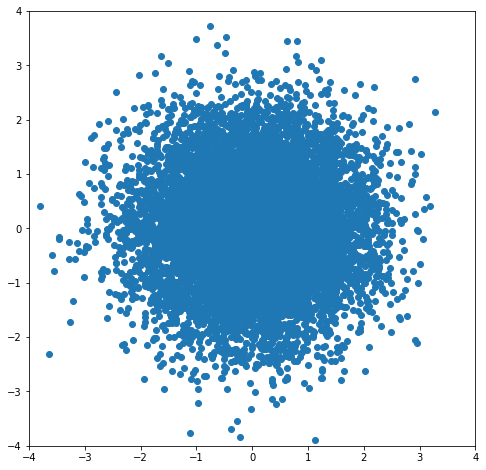

In [33]:
S /= S.std(axis=0)  # Standardize data

plt.figure(figsize=(8,8))
plt.scatter(S[:, 0], S[:, 1])
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()

In [34]:
# Mix data
A =  np.array([[1, 1], [0, 2]]) # Mixing matrix
A

array([[1, 1],
       [0, 2]])

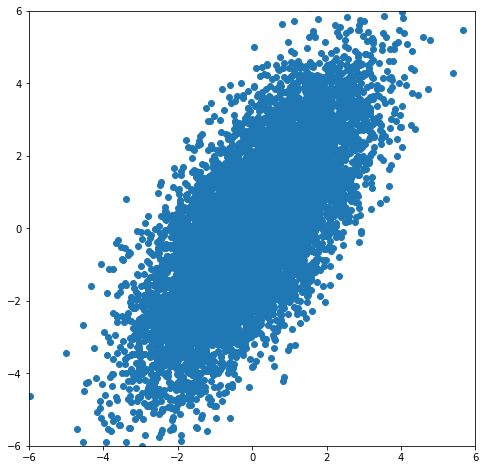

In [35]:
X = np.dot(S, A.T)  # Generate observations

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])
plt.xlim([-6,6])
plt.ylim([-6,6])
plt.show()

# Zad
Wykonaj algorytm PCA i wizualizuj bazę (komponenty)


In [36]:
pca = PCA()
S_pca_ = pca.fit(X).transform(X)

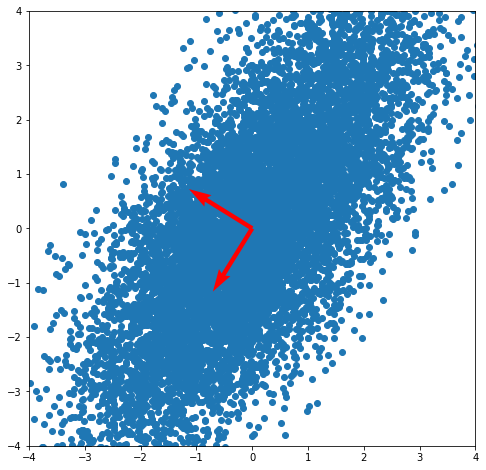

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])
x_axis, y_axis = pca.components_.T
plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color="r")

plt.xlim([-4,4])
plt.ylim([-4,4])
plt.show()


# Zad
Wykonaj algorytm PCA i wizualizuj bazę (komponenty)
```python
ica = FastICA()
S_ica_ = ica.fit(X).transform(X)

ica.mixing_
```

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


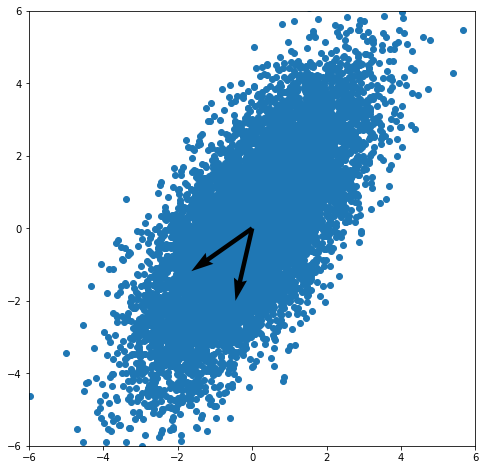

In [42]:
ica = FastICA(random_state=1)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

S_ica_ /= S_ica_.std(axis=0)

from numpy import linalg as LA
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1])

x_axis, y_axis = ica.mixing_/LA.norm(ica.mixing_, axis=0)
plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color="k")

plt.xlim([-6,6])
plt.ylim([-6,6])
plt.show()

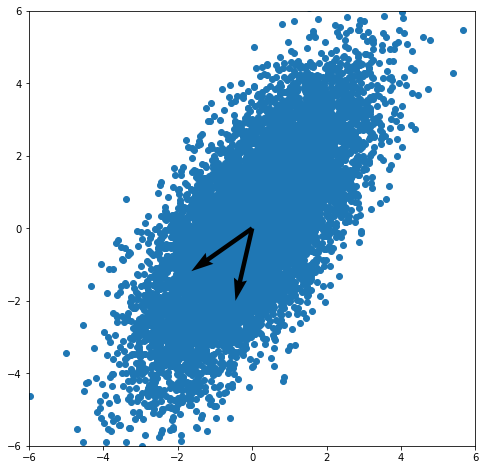